In [31]:
import sys
sys.path.append('../')

from IPython.core.display import display
import numpy as np
import pandas as pd
import networkx as nx

np.random.seed(333)

In [32]:
df = pd.read_csv("./facebook.txt", delimiter=" ")

In [33]:
display(df.head())
display(df.describe())

,u,v
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


,u,v
count,88234.000000,88234.000000
mean,1864.781773,2154.199130
std,910.292292,893.709532
min,0.000000,1.000000
25%,1160.000000,1600.000000
50%,1983.000000,2259.000000
75%,2423.000000,2631.000000
max,4031.000000,4038.000000


In [34]:
pd.__version__

'1.0.5'

0       347.0
1        17.0
2        10.0
3        17.0
4        10.0
        ...  
4034      2.0
4035      1.0
4036      2.0
4037      4.0
4038      9.0
Length: 4039, dtype: float64

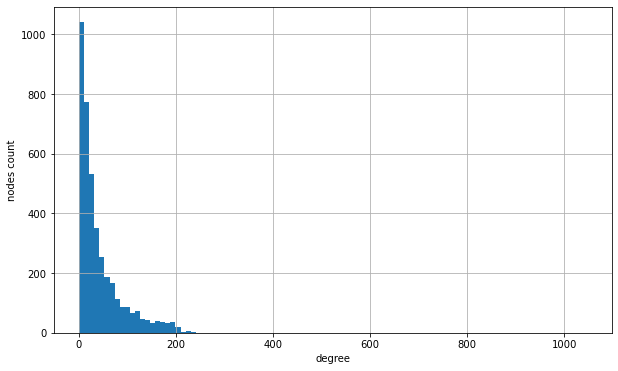

In [35]:
# distribution of edges by node

u_counts = df.u.value_counts()
v_counts = df.v.value_counts()
counts = u_counts.add(v_counts, fill_value=0)

display(counts)
degree_hist_ax = counts.hist(bins=100, figsize=(10, 6))
degree_hist_ax.set(xlabel='degree', ylabel='nodes count')
degree_hist_ax.get_figure().savefig('./degree_hist.png')
display(degree_hist_ax)

In [36]:
def edgelist_with_nodes_in(edgelist, nodes_filter):
    """filter edgelist to only nodes in nodes_filter"""
    return edgelist[edgelist.u.isin(nodes_filter) & edgelist.v.isin(nodes_filter)]

In [37]:
# remove users with count ≤ 1
print("len(df): ", len(df))
df = edgelist_with_nodes_in(df, counts[counts > 1].index)
print("len(df): ", len(df))

len(df):  88234
len(df):  88159


In [44]:
# recommend only for users with ≥50 friends
np.random.seed(333)
test_data = []

# test_users have ≥50 friends
test_users = counts[counts >= 50].index
print("test_users: ", test_users)

# networkx graph of df
G = nx.from_pandas_edgelist(df, "u", "v")

# generate n test edges for each test user
n = 1
for test_user in test_users:
    friends = list(G[test_user])
    test_friends = np.random.choice(friends, n, replace=False)
    for test_friend in test_friends:
        test_data.append((test_user, test_friend))
print("len(test_data): ", len(test_data))

# pd df from test_data
test = pd.DataFrame.from_records(test_data, columns=['u', 'v'])
print("len(test): ", len(test))

# remove test from df for train
print("len(df): ", len(df))
#df_sorted = pd.DataFrame.from_records([sorted(e) for e in df.iterrows()], columns=['u', 'v']) #TODO! len(df) should be equal to len(test) + len(train)
test_sorted = pd.DataFrame.from_records([sorted(e) for e in test_data], columns=['u', 'v'])
train = pd.concat([df, test_sorted]).drop_duplicates(keep=False)
print("len(train): ", len(train))
# length of train and test do not need to equal to length of df, because edges can be in test twice

test_users:  Int64Index([   0,    9,   21,   25,   26,   56,   67,  107,  119,  122,
            ...
            3684, 3756, 3824, 3830, 3838, 3851, 3877, 3938, 3948, 3980],
           dtype='int64', length=1169)
len(test_data):  1169
len(test):  1169
len(df):  88159
len(train):  86999


In [39]:
# save train and test csvs
train.to_csv("../../data/facebook/facebook.csv")
train.to_csv("./facebook_train.csv")
test.to_csv("./facebook_test.csv")

print("done")


done
